In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3 as sq
sns.set()
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [11]:
buoy = 41013

In [15]:
params = 'ocean'
base = 'http://www.ndbc.noaa.gov/data/realtime2/'
link = base + str(buoy) + '.' + params

#combine the first five date columns YY MM DD hh mm and make index
df = pd.read_csv(link, delim_whitespace=True, 
    parse_dates=[[0,1,2,3,4]], index_col=0)

#units are in the second row drop them
#df.columns = df.columns + '('+ df.iloc[0] + ')'
df.drop(df.index[0], inplace=True)

#convert the dates to datetimes
df.index = pd.to_datetime(df.index,format="%Y %m %d %H %M")
#units are in the second row drop them
#df.columns = df.columns + '('+ df.iloc[0] + ')'
#df.drop(df.index[0], inplace=True)

#convert the dates to datetimes
#df.index = pd.to_datetime(df.index,format="%Y %m %d %H %M")

In [16]:
df

,DEPTH,OTMP,COND,SAL,O2%,O2PPM,CLCON,TURB,PH,EH
2016-01-28 21:40:00,1,18.61,47.83,36.11,MM,MM,MM,MM,MM,MM
2016-01-28 21:30:00,1,18.58,47.80,36.12,MM,MM,MM,MM,MM,MM
2016-01-28 21:20:00,1,18.59,47.81,36.12,MM,MM,MM,MM,MM,MM
2016-01-28 21:10:00,1,18.57,47.78,36.12,MM,MM,MM,MM,MM,MM
2016-01-28 21:00:00,1,18.57,47.78,36.11,MM,MM,MM,MM,MM,MM
2016-01-28 20:50:00,1,18.55,47.76,36.11,MM,MM,MM,MM,MM,MM
2016-01-28 20:40:00,1,18.54,47.77,36.13,MM,MM,MM,MM,MM,MM
2016-01-28 20:30:00,1,18.52,47.76,36.14,MM,MM,MM,MM,MM,MM
2016-01-28 20:20:00,1,18.53,47.77,36.14,MM,MM,MM,MM,MM,MM
2016-01-28 20:10:00,1,18.54,47.79,36.14,MM,MM,MM,MM,MM,MM


In [1]:
import sys

In [2]:
#alter the line below to correspond to your file system
buoypy_dir = '/Users/nickc/Documents/buoypy'
sys.path.append(buoypy_dir)

In [3]:
import buoypy as bp

In [4]:
reload(bp)

<module 'buoypy' from '/Users/nickc/Documents/buoypy/buoypy/__init__.pyc'>

In [4]:
rt = bp.realtime()

In [6]:
df = rt.get_spec(41013)

In [7]:
df.head()

,WVHT,SwH,SwP,WWH,WWP,SwD,WWD,STEEPNESS,APD,MWD
2016-01-28 20:41:00,1.5,0.8,7.7,1.3,4.8,E,NE,AVERAGE,4.7,91
2016-01-28 19:41:00,1.5,0.5,10.0,1.4,7.1,ESE,ENE,STEEP,4.7,73
2016-01-28 18:41:00,1.6,0.9,7.1,1.3,4.0,E,NE,STEEP,4.9,79
2016-01-28 17:41:00,1.7,1.1,7.1,1.4,5.9,E,ENE,STEEP,5.1,80
2016-01-28 16:41:00,1.7,1.0,7.1,1.3,6.2,E,ENE,STEEP,5.1,79


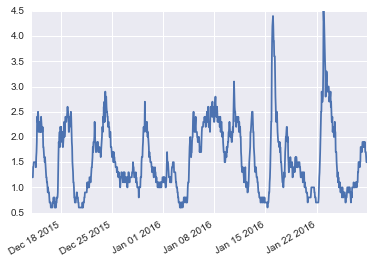

In [13]:
df.WVHT.plot()

In [5]:
df2 = rt.get_data_spec(41013)

In [6]:
df2.head()

,0.033,0.038,0.043,0.048,0.053,0.058,0.063,0.068,0.073,0.078,...,0.330,0.340,0.350,0.365,0.385,0.405,0.425,0.445,0.465,0.485
2016-01-28 21:00:00,0,0,0,0,0,0,0,0,0,0.000,...,0.081,0.097,0.081,0.048,0.048,0.081,0.048,0.032,0.048,0.032
2016-01-28 20:00:00,0,0,0,0,0,0,0,0,0,0.000,...,0.115,0.101,0.115,0.058,0.043,0.072,0.014,0.029,0.029,0.014
2016-01-28 19:00:00,0,0,0,0,0,0,0,0,0,0.000,...,0.110,0.055,0.055,0.055,0.083,0.028,0.028,0.028,0.028,0.000
2016-01-28 18:00:00,0,0,0,0,0,0,0,0,0,0.000,...,0.108,0.144,0.036,0.072,0.072,0.072,0.036,0.036,0.036,0.036
2016-01-28 17:00:00,0,0,0,0,0,0,0,0,0,0.029,...,0.057,0.029,0.057,0.057,0.029,0.057,0.029,0.029,0.000,0.000


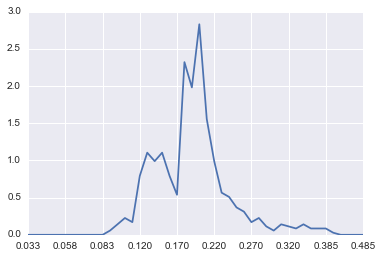

In [9]:
df2.iloc[20,:].plot()

In [56]:
mask = df=='MM'
df[mask]=np.nan
df[['WVHT','SwH','SwP','WWH','WWP','APD','MWD']] = df[['WVHT',
        'SwH','SwP','WWH','WWP','APD','MWD']].astype(float)

In [57]:
df.head()

,WVHT,SwH,SwP,WWH,WWP,SwD,WWD,STEEPNESS,APD,MWD
2016-01-28 20:41:00,1.5,0.8,7.7,1.3,4.8,E,NE,AVERAGE,4.7,91
2016-01-28 19:41:00,1.5,0.5,10.0,1.4,7.1,ESE,ENE,STEEP,4.7,73
2016-01-28 18:41:00,1.6,0.9,7.1,1.3,4.0,E,NE,STEEP,4.9,79
2016-01-28 17:41:00,1.7,1.1,7.1,1.4,5.9,E,ENE,STEEP,5.1,80
2016-01-28 16:41:00,1.7,1.0,7.1,1.3,6.2,E,ENE,STEEP,5.1,79


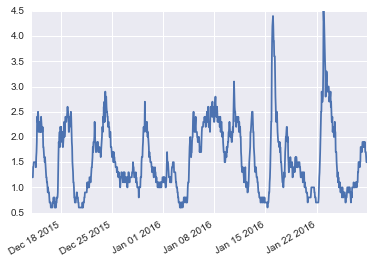

In [58]:
df.WVHT.plot()